In [18]:
import warnings
warnings.filterwarnings(action='once')

In [19]:


import statsmodels.api as sm
import numpy as np

In [20]:
# Draw random variables from a normal distribution with numpy
normalRandomVariables = np.random.normal(0,1, 1000)

# Create object that has descriptive statistics as variables
x = sm.stats.DescrStatsW(normalRandomVariables)

print(x)

In [21]:
# Mean
print(x.mean)

# Standard deviation
print(x.std)

# Variance
print(x.var)

-0.0018291578756071268
0.9862137092668422
0.9726174803458635


In [22]:
# Generate confidence interval for a population proportion

tstar = 1.96

# Observer population proportion
p = .85

# Size of population
n = 659

# Construct confidence interval
sm.stats.proportion_confint(n * p, n)

(0.8227378265796143, 0.8772621734203857)

In [23]:
import pandas as pd

# Import data that will be used to construct confidence interval of population mean
df = pd.read_csv("https://raw.githubusercontent.com/UMstatspy/UMStatsPy/master/Course_1/Cartwheeldata.csv")

# Generate confidence interval for a population mean
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()

URLError: <urlopen error Tunnel connection failed: 407 Proxy Authentication Required>

In [ ]:
# One population proportion hypothesis testing

# Population size
n = 1018

# Null hypothesis population proportion
pnull = .52

# Observe population proportion
phat = .56

# Calculate test statistic and p-value
sm.stats.proportions_ztest(phat * n, n, pnull)

In [24]:
# Using the dataframe imported above, perform a hypothesis test for population mean
sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")

(0.8234523266982029, 0.20512540845395266)

In [25]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from sklearn.datasets import load_boston
boston_dataset = load_boston() 

boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

boston["MEDV"] = boston_dataset.target

In [26]:
boston.shape

(506, 14)

In [27]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [28]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

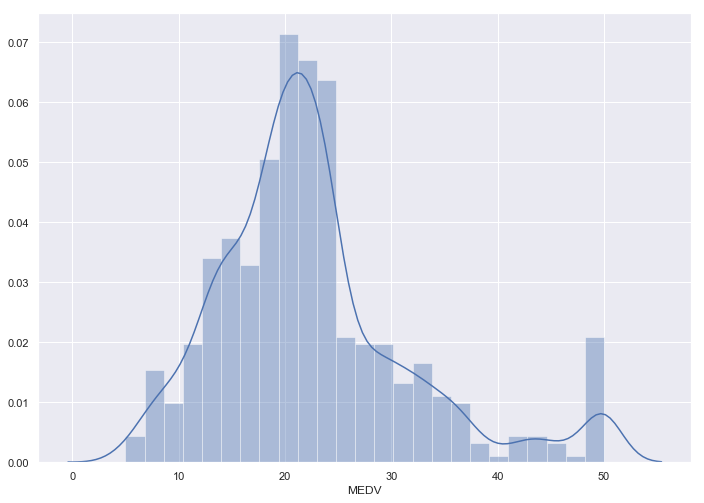

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston["MEDV"], bins = 25)
plt.show()

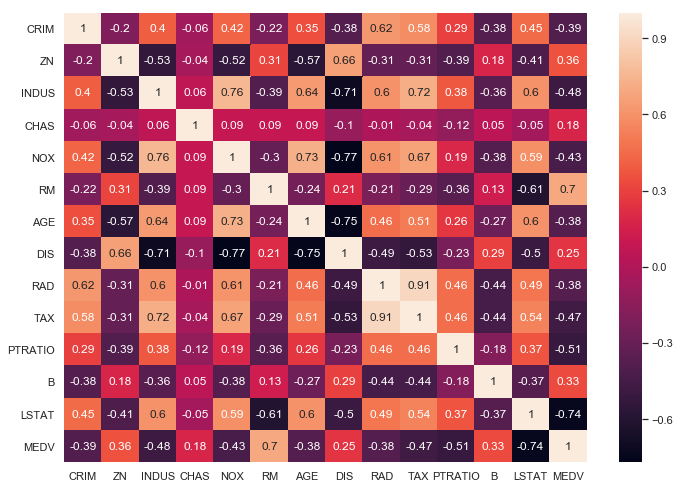

In [30]:
correlation_matrix = boston.corr().round(2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

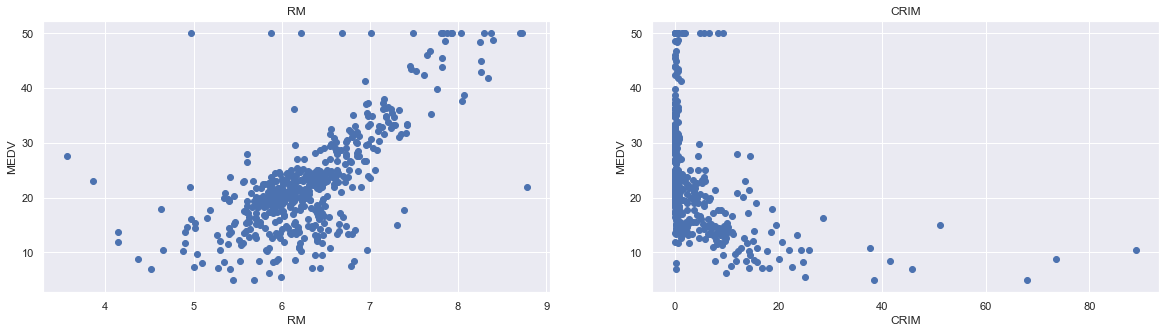

In [31]:
plt.figure(figsize=(20, 5))

features = ['RM', 'CRIM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

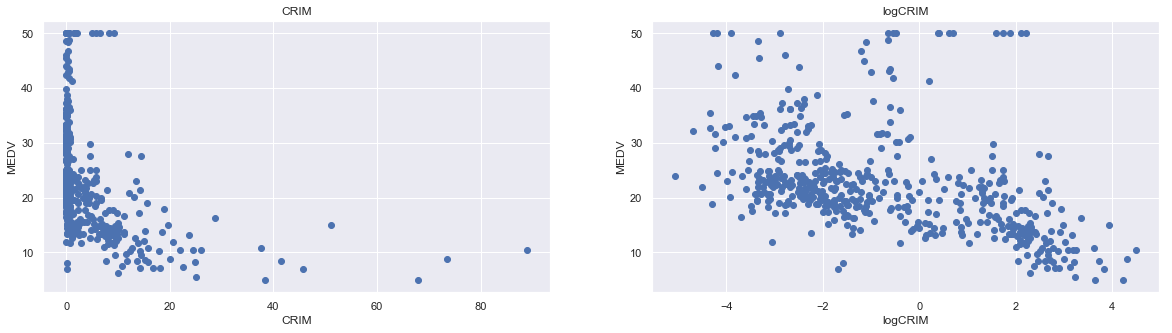

In [32]:
plt.figure(figsize=(20, 5))

boston["logCRIM"] = np.log(boston["CRIM"])

features = ['CRIM', 'logCRIM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Fitting Model to Independent Data